In [32]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../dataframes/h3n2_ha_12y_hi_egg.csv')

In [162]:
df['year'] = df['date'].astype('int')
groups = df.groupby(['kk_clade', 'year'])

egg_muts = ['G186V','L194P','A138S','H156R','H156Q', 'T203I','S219F','S219Y', 'D225G','N246H']

adaptation_by_year = []
for k, v in groups:
    num_egg_muts = []
    num_top_muts = []
    num_strains_with_mut = 0
    for k_v, v_v in v.iterrows():
        strain_egg_muts = ast.literal_eval(v_v['egg_muts'])
        num_egg_muts.append(len(strain_egg_muts))
        top_muts = 0
        for strain_egg_mut in strain_egg_muts:
            if strain_egg_mut in egg_muts:
                top_muts+=1
        num_top_muts.append(top_muts)
        has_top_mut = False
        for egg_mut in egg_muts:
            if egg_mut in strain_egg_muts:
                has_top_mut = True
        if has_top_mut == True:
            num_strains_with_mut+=1

    avg_num_egg_muts = sum(num_egg_muts)/len(v)
    avg_num_top_muts = sum(num_top_muts)/len(v)
    freq_with_top_mut = num_strains_with_mut/len(v)
    
    adaptation_by_year.append({'clade': k[0], 'year': k[1], 'sample_size': len(v), 
                               'avg_num_egg_muts': avg_num_egg_muts, 'freq_with_top_mut': freq_with_top_mut, 
                               'avg_num_top_muts': avg_num_top_muts})

adaptation_df = pd.DataFrame(adaptation_by_year)

In [163]:
#add line for vaccine effectiveness
vaccine_effectiveness = [(2011, 39), (2012, 39), (2014, 6), (2016, 33), (2017, 22)]
ve_df = pd.DataFrame(vaccine_effectiveness).rename(columns={0:'year', 1:'ve'})
ve_df['VE'] = 'H3N2'

Text(0,0.5,'Average number of egg mutations per strain')

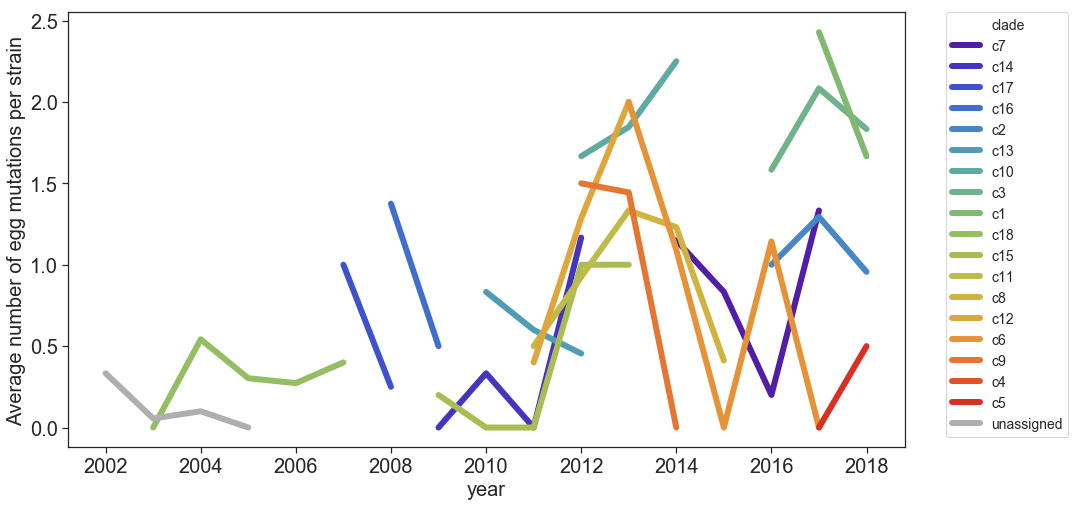

In [164]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style="ticks", rc={"lines.linewidth": 6.0})
sns.lineplot(x='year', y='avg_num_top_muts', hue='clade', 
                   data=adaptation_df, ax=ax, hue_order = ['c7','c14','c17','c16','c2','c13',
                                                           'c10','c3','c1','c18','c15',
                                                           'c11','c8','c12','c6','c9',
                                                           'c4','c5','unassigned'],
                   palette = ["#511EA8", "#4335BF", "#3F51CC", "#416ECE", "#4887C6", "#529BB6", 
                    "#5FA9A0", "#6EB389", "#81B973", "#95BD61", "#AABD52", "#BFBB48", 
                    "#D1B340", "#DEA63B", "#E69237", "#E67531", "#E1522A", "#DC2F24", "#afafaf"])
ax.tick_params(labelsize=20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, prop={'size': 14}, borderaxespad=0.)
plt.xlabel('year', size=20)
plt.ylabel('Average number of egg mutations per strain', size=20)

# ax2 = ax.twinx()
# sns.scatterplot(x='year', y='ve', hue='VE', data=ve_df, palette=['black'], ax=ax2, s=300)
# plt.ylim(0,100)
# plt.legend(bbox_to_anchor=(1.08, 1), loc=2, borderaxespad=0.)
# plt.ylabel('H3N2 vaccine effectiveness', size=14)


In [147]:
df['year'] = df['date'].astype('int')
years = df.groupby('year')

egg_muts = ['G186V','L194P','A138S','H156R','H156Q', 'T203I','S219F','S219Y', 'D225G','N246H']

adaptation_per_year = []
for k, v in years:
    num_egg_muts = []
    num_top_muts = []
    num_strains_with_mut = 0
    for k_v, v_v in v.iterrows():
        strain_egg_muts = ast.literal_eval(v_v['egg_muts'])
        num_egg_muts.append(len(strain_egg_muts))
        top_muts = 0
        for strain_egg_mut in strain_egg_muts:
            if strain_egg_mut in egg_muts:
                top_muts+=1
        num_top_muts.append(top_muts)
        has_top_mut = False
        for egg_mut in egg_muts:
            if egg_mut in strain_egg_muts:
                has_top_mut = True
        if has_top_mut == True:
            num_strains_with_mut+=1

    avg_num_egg_muts = sum(num_egg_muts)/len(v)
    avg_num_top_muts = sum(num_top_muts)/len(v)
    freq_with_top_mut = num_strains_with_mut/len(v)
    
    adaptation_per_year.append({'year': k, 'sample_size': len(v), 
                               'avg_num_egg_muts': avg_num_egg_muts, 'freq_with_top_mut': freq_with_top_mut, 
                               'avg_num_top_muts': avg_num_top_muts})

adaptation_year_df = pd.DataFrame(adaptation_per_year)

No handles with labels found to put in legend.


Text(0,0.5,'Frequency of strains with at least one egg-adapted mutation')

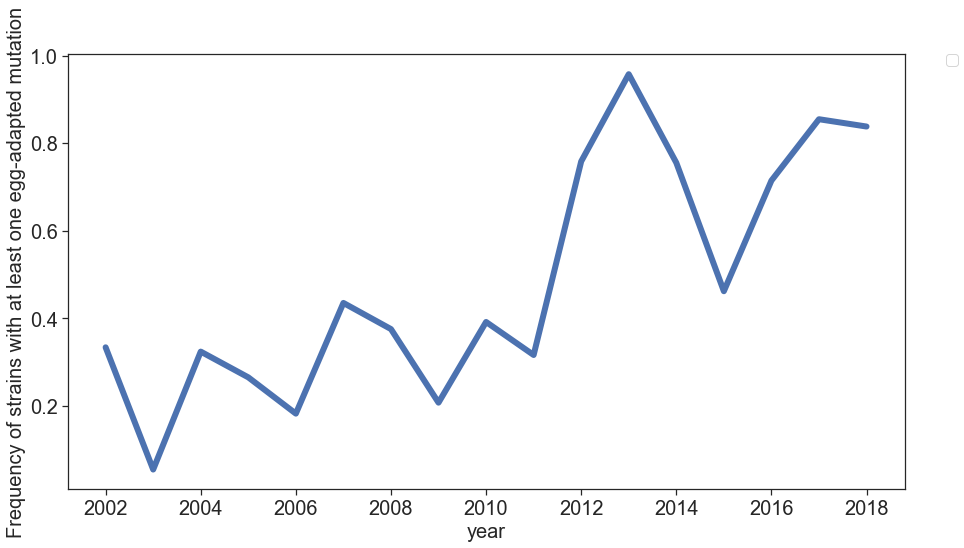

In [150]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style="ticks", rc={"lines.linewidth": 6.0})
sns.lineplot(x='year', y='freq_with_top_mut', 
                   data=adaptation_year_df, ax=ax)
ax.tick_params(labelsize=20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, prop={'size': 14}, borderaxespad=0.)
plt.xlabel('year', size=20)
plt.ylabel('Frequency of strains with at least one egg-adapted mutation', size=20)

# ax2 = ax.twinx()
# sns.scatterplot(x='year', y='ve', hue='VE', data=ve_df, palette=['black'], ax=ax2, s=300)
# plt.ylim(0,100)
# plt.legend(bbox_to_anchor=(1.08, 1), loc=2, borderaxespad=0.)
# plt.ylabel('H3N2 vaccine effectiveness', size=14)


In [ ]:
#Vaccine strains and clade membership
Perth: (2011, 'c15')
Victoria: (2012, 'c12')
Victoria: (2013, 'c12')
Texas: (2014, 'c11')
Switzerland: (2015, 'c6')
HongKong: (2016, 'c7')
HongKong: (2017, 'c7')
Singapore: (2018, 'c3')

In [160]:
df['year'] = df['date'].astype('int')
groups = df.groupby(['kk_clade', 'year'])

egg_muts = ['G186V','L194P','A138S','H156R','H156Q', 'T203I','S219F','S219Y', 'D225G','N246H']

adaptation_error = []
for k, v in groups:
    for k_v, v_v in v.iterrows():
        strain_egg_muts = ast.literal_eval(v_v['egg_muts'])
        num_egg_muts = len(strain_egg_muts)
        num_top_muts = 0
        for strain_egg_mut in strain_egg_muts:
            if strain_egg_mut in egg_muts:
                num_top_muts+=1
        adaptation_error.append({'clade': k[0], 'year': k[1], 
                           'num_egg_muts': num_egg_muts, 
                           'num_top_muts': num_top_muts})



adaptation_error_df = pd.DataFrame(adaptation_error)

/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


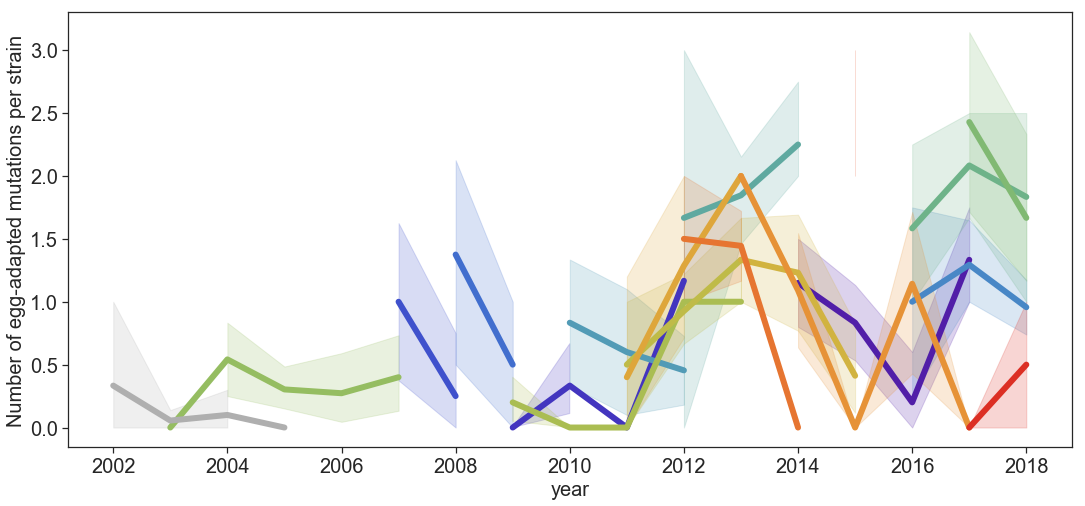

In [173]:
fig, ax = plt.subplots(figsize=(18,8))
sns.set(style="ticks", rc={"lines.linewidth": 6.0})
sns.lineplot(x='year', y='num_top_muts', hue='clade', ci=95, 
                   data=adaptation_error_df, ax=ax, hue_order = ['c7','c14','c17','c16','c2','c13',
                                                           'c10','c3','c1','c18','c15',
                                                           'c11','c8','c12','c6','c9',
                                                           'c4','c5','unassigned'],
                   palette = ["#511EA8", "#4335BF", "#3F51CC", "#416ECE", "#4887C6", "#529BB6", 
                    "#5FA9A0", "#6EB389", "#81B973", "#95BD61", "#AABD52", "#BFBB48", 
                    "#D1B340", "#DEA63B", "#E69237", "#E67531", "#E1522A", "#DC2F24", "#afafaf"])
ax.tick_params(labelsize=20)
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, prop={'size': 14}, borderaxespad=0.)
ax.legend().set_visible(False)
plt.xlabel('year', size=20)
plt.ylabel('Number of egg-adapted mutations per strain', size=20)

plt.savefig("eggadaptation_byyear.png", bbox_inches='tight')

# ax2 = ax.twinx()
# sns.scatterplot(x='year', y='ve', hue='VE', data=ve_df, palette=['black'], ax=ax2, s=300)
# plt.ylim(0,100)
# plt.legend(bbox_to_anchor=(1.08, 1), loc=2, borderaxespad=0.)
# plt.ylabel('H3N2 vaccine effectiveness', size=14)
